<a href="https://colab.research.google.com/github/BitUpTeam/BitUp/blob/Nikita/BitUp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()  # устанавливаем seaborn по умолчанию для отрисовки графиков

from google.colab import files


import os
import pandas as pd
import numpy as np
import math
import datetime as dt
import matplotlib.pyplot as plt

# For Evalution we will use these library

from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score, r2_score 
from sklearn.metrics import mean_poisson_deviance, mean_gamma_deviance, accuracy_score
from sklearn.preprocessing import MinMaxScaler

# For model building we will use these library

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.layers import LSTM


# For PLotting we will use these library

import matplotlib.pyplot as plt
from itertools import cycle
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

Датасет взят с сайта:

https://finance.yahoo.com/quote/BTC-USD/history/?guce_referrer=aHR0cHM6Ly95YW5kZXgucnUv&guce_referrer_sig=AQAAAKtAikX_EkqeQv0HV7qwUmaA3UU46eEFgUX58h4XR7y1HfhNmMapnqzP4Yw5lx0Pq5tQKlO9BNrQEwKyS85IvL9ogMT57AmyaFeeITSYPwoBTo4FHgh6JBK0kJb0xAB1AzSerc_GlH5gpnyQ-JKFUiO0uM4Bzj058N0vMKOZ48SN&guccounter=2

In [ ]:
files.upload()

# Первичный анализ датасета

In [72]:
df = pd.read_csv('BTC-USD-DAY-17.09.2014-06.03.2023.csv')
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100
...,...,...,...,...,...,...,...
3088,2023-03-02,23647.019531,23739.138672,23245.021484,23475.466797,23475.466797,20386398516
3089,2023-03-03,23476.632813,23479.347656,22213.238281,22362.679688,22362.679688,26062404610
3090,2023-03-04,22362.923828,22405.177734,22198.980469,22353.349609,22353.349609,11166012913
3091,2023-03-05,22354.144531,22613.685547,22307.142578,22435.513672,22435.513672,13317001733


In [73]:
df.describe() # общая статистика числовых данных

,Open,High,Low,Close,Adj Close,Volume
count,3093.000000,3093.000000,3093.000000,3093.000000,3093.000000,3.093000e+03
mean,13044.438332,13369.890972,12683.359143,13050.012362,13050.012362,1.649439e+10
std,16073.605881,16482.995009,15601.306076,16069.411984,16069.411984,1.982021e+10
min,176.897003,211.731003,171.509995,178.102997,178.102997,5.914570e+06
25%,703.812012,714.117981,696.474976,703.702026,703.702026,1.092250e+08
50%,7277.590820,7437.640137,7114.020020,7278.119629,7278.119629,8.428290e+09
75%,17817.083984,18553.298828,17515.300781,17934.896484,17934.896484,2.791964e+10
max,67549.734375,68789.625000,66382.062500,67566.828125,67566.828125,3.509679e+11


In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3093 entries, 0 to 3092
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       3093 non-null   object 
 1   Open       3093 non-null   float64
 2   High       3093 non-null   float64
 3   Low        3093 non-null   float64
 4   Close      3093 non-null   float64
 5   Adj Close  3093 non-null   float64
 6   Volume     3093 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 169.3+ KB


Вывод: как мы видим у нас в датасете нет нулевых значений и пропусков.

In [75]:
fig = px.line(df, x=df.Date, y=df.Close)
fig.update_traces(marker_line_width=2, opacity=0.8, marker_line_color='orange')
fig.update_layout(title_text='График цены Bitcoin за 2014-2023', plot_bgcolor='white', 
                  font_size=15, font_color='black')
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

# Попытка прогнозирования цены с помощью ML

Чтобы учитывать цену предыдущего дня добавим столбец со смещенной ценой

In [76]:
trainPredictPlot = np.empty_like(df['Date'])
trainPredictPlot[::] = 0
trainPredictPlot = trainPredictPlot.tolist()
print(len(trainPredictPlot))
trainPredictPlot[1:3093:] = df.Close[0:3092:]
print(len(trainPredictPlot))
df['Moved Close'] = trainPredictPlot

3093
3093


In [77]:
df

,Date,Open,High,Low,Close,Adj Close,Volume,Moved Close
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800,0.000000
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200,457.334015
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700,424.440002
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600,394.795990
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100,408.903992
...,...,...,...,...,...,...,...,...
3088,2023-03-02,23647.019531,23739.138672,23245.021484,23475.466797,23475.466797,20386398516,23646.550781
3089,2023-03-03,23476.632813,23479.347656,22213.238281,22362.679688,22362.679688,26062404610,23475.466797
3090,2023-03-04,22362.923828,22405.177734,22198.980469,22353.349609,22353.349609,11166012913,22362.679688
3091,2023-03-05,22354.144531,22613.685547,22307.142578,22435.513672,22435.513672,13317001733,22353.349609


<ipython-input-78-e8fee15cb50e>:4: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



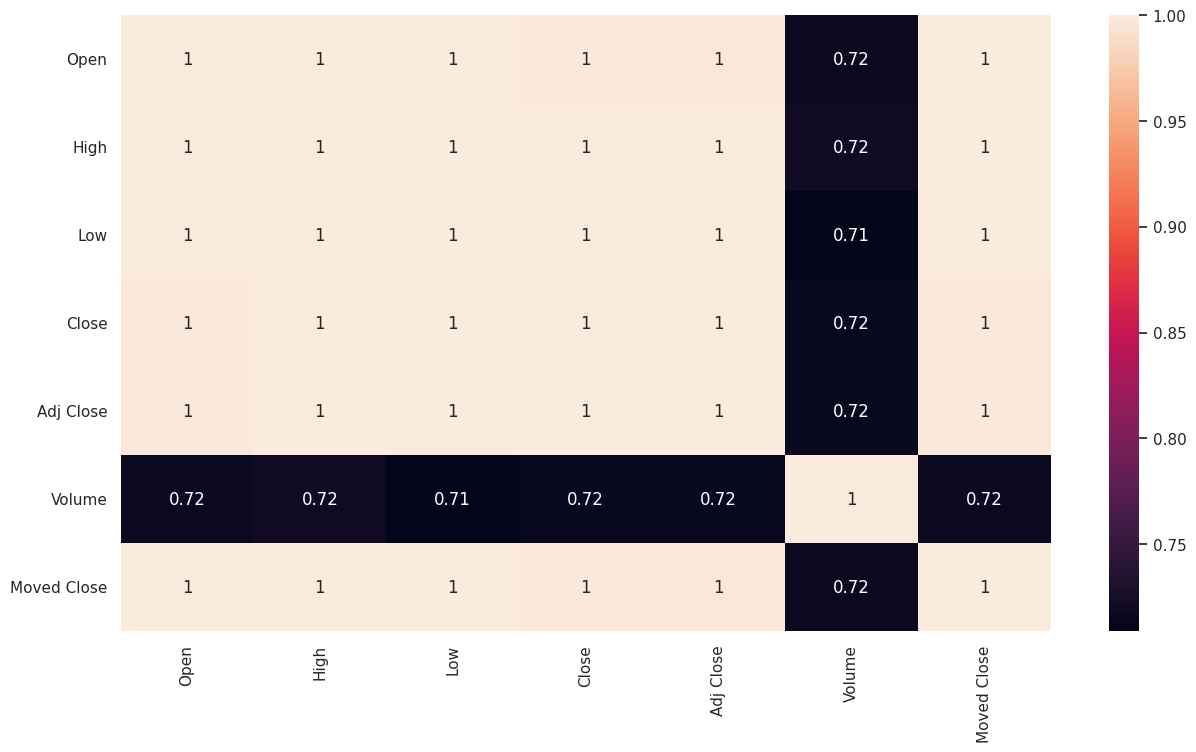

In [78]:
features = ['Open', 'High',	'Low', 'Volume']
target = 'Moved Close'

sns.heatmap(df.corr(), annot=True)
plt.gcf().set_size_inches(15, 8)

Как мы видим у нас происходит сильная кореляция из-за того что числа слишком большие и изменяются на маленький %.

In [79]:
del df['Adj Close']

new_col = ['Open', 'High', 'Low', 'Close', 'Volume', 'Moved Close']
col_count = len(new_col)

new_row = [[] for i in range(col_count)]
row_count = df.count()[0]

for i in range(col_count):
  col = df[new_col[i]]
  new_row[i].append(0)

  for j in range(1, row_count):
    new_row[i].append((col[j] / col[j - 1] - 1))
  
  df[new_col[i] + ' Diff'] = new_row[i]

df.loc[1,'Moved Close Diff'] = 0
df

<ipython-input-79-2343e07cbc46>:14: RuntimeWarning:

divide by zero encountered in double_scalars



,Date,Open,High,Low,Close,Volume,Moved Close,Open Diff,High Diff,Low Diff,Close Diff,Volume Diff,Moved Close Diff
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,21056800,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,34483200,457.334015,-0.019328,-0.024166,-0.086906,-0.071926,0.637628,0.000000
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,37919700,424.440002,-0.071700,-0.063531,-0.069164,-0.069843,0.099657,-0.071926
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,36863600,394.795990,-0.069394,-0.010609,0.013916,0.035735,-0.027851,-0.069843
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,26580100,408.903992,0.033983,-0.025679,0.008459,-0.024659,-0.278961,0.035735
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3088,2023-03-02,23647.019531,23739.138672,23245.021484,23475.466797,20386398516,23646.550781,0.021429,-0.005925,0.006774,-0.007235,-0.173396,0.021566
3089,2023-03-03,23476.632813,23479.347656,22213.238281,22362.679688,26062404610,23475.466797,-0.007205,-0.010944,-0.044387,-0.047402,0.278421,-0.007235
3090,2023-03-04,22362.923828,22405.177734,22198.980469,22353.349609,11166012913,22362.679688,-0.047439,-0.045750,-0.000642,-0.000417,-0.571566,-0.047402
3091,2023-03-05,22354.144531,22613.685547,22307.142578,22435.513672,13317001733,22353.349609,-0.000393,0.009306,0.004872,0.003676,0.192637,-0.000417


In [80]:
fig = px.line(df, x=df.Date, y=df['Close Diff'])
fig.update_traces(marker_line_width=2, opacity=0.8, marker_line_color='orange')
fig.update_layout(title_text='График изменения цены Bitcoin в % за 2014-2023', plot_bgcolor='white', 
                  font_size=15, font_color='black')
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

<ipython-input-81-e01f708cdcbd>:4: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



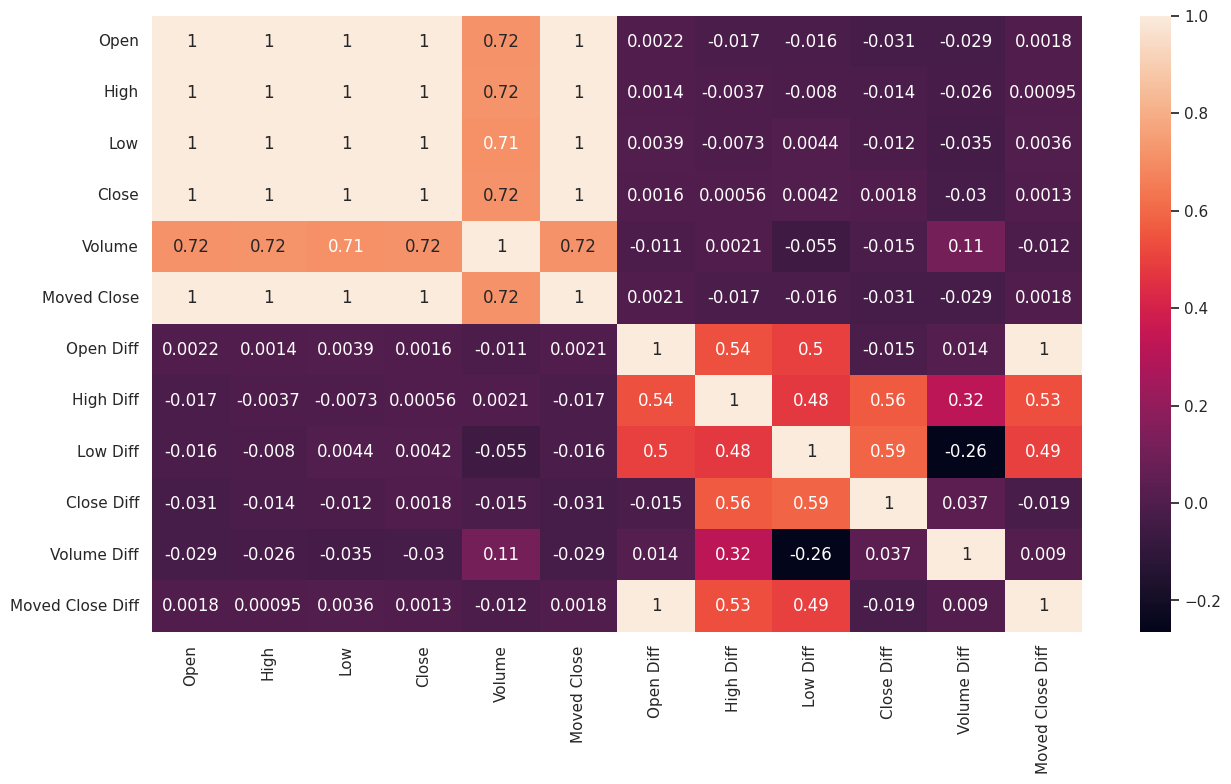

In [81]:
features = ['Open Diff', 'Moved Close Diff']
target = 'Close Diff'

sns.heatmap(df.corr(), annot=True)
plt.gcf().set_size_inches(15, 8)

Можем увивдить, что теперь коэфициенты кореляции более оправданы, попробуем обучить модель.

In [82]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

x_train, x_test, y_train, y_test = train_test_split(df[features], df[target], test_size = 0.3, random_state=20)

model = LinearRegression()
model.fit(x_train, y_train)


LinearRegression()

In [83]:
print('Точность модели на обучающей выборке', model.score(x_train, y_train))
print('Точность модели на тестовой выборке', model.score(x_test, y_test))
print('MSE на обучающей выборке', mean_squared_error(y_train, model.predict(x_train)))
print('MSE на тестовой выборке', mean_squared_error(y_test, model.predict(x_test)))

Точность модели на обучающей выборке 0.0064730895674210975
Точность модели на тестовой выборке -0.020079239030794005
MSE на обучающей выборке 0.001495109432648261
MSE на тестовой выборке 0.0013475226758085006


In [84]:
trainPredictPlot = np.empty_like(df['Date'])
trainPredictPlot[::] = np.nan
trainPredictPlot = trainPredictPlot.tolist()
print(len(trainPredictPlot))
trainPredictPlot[0:2165:] = model.predict(x_train)
print(len(trainPredictPlot))
df['predict_train'] = trainPredictPlot

testPredictPlot = np.empty_like(df['Date'])
testPredictPlot[::] = np.nan
testPredictPlot = testPredictPlot.tolist()
testPredictPlot[2165:2165 + 928:] = model.predict(x_test)
df['predict_test'] = testPredictPlot

3093
3093


In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3093 entries, 0 to 3092
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date              3093 non-null   object 
 1   Open              3093 non-null   float64
 2   High              3093 non-null   float64
 3   Low               3093 non-null   float64
 4   Close             3093 non-null   float64
 5   Volume            3093 non-null   int64  
 6   Moved Close       3093 non-null   float64
 7   Open Diff         3093 non-null   float64
 8   High Diff         3093 non-null   float64
 9   Low Diff          3093 non-null   float64
 10  Close Diff        3093 non-null   float64
 11  Volume Diff       3093 non-null   float64
 12  Moved Close Diff  3093 non-null   float64
 13  predict_train     2165 non-null   float64
 14  predict_test      928 non-null    float64
dtypes: float64(13), int64(1), object(1)
memory usage: 362.6+ KB


In [86]:
fig = px.line(df, x=df.Date, y=[df['Close Diff'], df['predict_train'], df['predict_test']])
fig.update_traces(marker_line_width=2, opacity=0.8, marker_line_color='orange')
fig.update_layout(title_text='График изменения цены Bitcoin в % за 2014-2023', plot_bgcolor='white', 
                  font_size=15, font_color='black')
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

In [87]:
trainPredictPlot = np.empty_like(df['Date'])
trainPredictPlot[::] = np.nan
trainPredictPlot = trainPredictPlot.tolist()
print(len(trainPredictPlot))
trainPredictPlot[0:2165:] = (model.predict(x_train) + 1) * df.Close[0:2165:]
print(len(trainPredictPlot))
df['predict_train_close'] = trainPredictPlot
testPredictPlot = np.empty_like(df['Date'])
testPredictPlot[::] = np.nan
testPredictPlot = testPredictPlot.tolist()
testPredictPlot[2165:2165 + 928:] = (model.predict(x_test) + 1) * df.Close[2165:2165 + 928:]
df['predict_test_close'] = testPredictPlot

3093
3093


In [88]:
fig = px.line(df, x=df.Date, y=[df['Close'], df['predict_train_close'], df['predict_test_close']])
fig.update_traces(marker_line_width=2, opacity=0.8, marker_line_color='orange')
fig.update_layout(title_text='График изменения цены Bitcoin в % за 2014-2023', plot_bgcolor='white', 
                  font_size=15, font_color='black')
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

Вывод: Хоть у нас и достаточно низкая точность, наша модель достаточно неплохо апроксимирует график

# Анализ для использования LSTM

## Анализ 2015 года

In [89]:
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')

y_2015 = df.loc[(df['Date'] >= '2015-01-01')
                     & (df['Date'] < '2015-12-31')]

y_2015

,Date,Open,High,Low,Close,Volume,Moved Close,Open Diff,High Diff,Low Diff,Close Diff,Volume Diff,Moved Close Diff,predict_train,predict_test,predict_train_close,predict_test_close
106,2015-01-01,320.434998,320.434998,314.002991,314.248993,8036550,320.192993,0.030623,0.000756,0.012224,-0.018564,-0.423610,0.030431,-0.002009,NaN,313.617712,NaN
107,2015-01-02,314.079010,315.838989,313.565002,315.032013,7860650,314.248993,-0.019835,-0.014343,-0.001395,0.002492,-0.021888,-0.018564,-0.000031,NaN,315.022197,NaN
108,2015-01-03,314.846008,315.149994,281.082001,281.082001,33054400,315.032013,0.002442,-0.002181,-0.103593,-0.107767,3.205047,0.002492,0.000900,NaN,281.334984,NaN
109,2015-01-04,281.145996,287.230011,257.612000,264.195007,55629100,281.082001,-0.107036,-0.088593,-0.083499,-0.060079,0.682956,-0.107767,0.006861,NaN,266.007620,NaN
110,2015-01-05,265.084015,278.341003,265.084015,274.473999,43962800,264.195007,-0.057130,-0.030947,0.029005,0.038907,-0.209716,-0.060079,0.001484,NaN,274.881310,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
465,2015-12-26,455.756012,457.489014,405.760010,417.273987,116166000,455.653015,0.001981,-0.001780,-0.102450,-0.084229,1.972632,0.001468,0.005113,NaN,419.407641,NaN
466,2015-12-27,416.514008,424.006989,408.882996,422.822998,53591200,417.273987,-0.086103,-0.073187,0.007697,0.013298,-0.538667,-0.084229,0.001702,NaN,423.542709,NaN
467,2015-12-28,423.342987,429.769012,418.480988,422.278992,49638600,422.822998,0.016396,0.013589,0.023474,-0.001287,-0.073755,0.013298,-0.001556,NaN,421.621827,NaN
468,2015-12-29,422.097992,432.983002,420.627014,432.983002,51596500,422.278992,-0.002941,0.007478,0.005128,0.025348,0.039443,-0.001287,-0.000060,NaN,432.957062,NaN


In [12]:
monthvise_min = y_2015.groupby(y_2015['Date'].dt.strftime('%B'))[['Open','Close']].min()
new_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 
             'September', 'October', 'November', 'December']
monthvise_min = monthvise_min.reindex(new_order, axis=0)
monthvise_min

,Open,Close
Date,,
January,176.897003,178.102997
February,216.867004,217.110992
March,242.878998,242.712997
April,219.072998,219.158997
May,229.662003,229.781998
June,222.878998,222.880997
July,255.459000,255.412003
August,210.067993,210.494995
September,226.968994,227.085007


In [14]:
monthvise_mean = y_2015.groupby(y_2015['Date'].dt.strftime('%B'))[['Open','Close']].mean()
new_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 
             'September', 'October', 'November', 'December']
monthvise_mean = monthvise_mean.reindex(new_order, axis=0)
monthvise_mean

,Open,Close
Date,,
January,251.799905,248.782547
February,232.821856,234.153645
March,269.278419,269.042259
April,235.708667,235.491534
May,237.161806,236.997001
June,236.941433,238.081766
July,278.857679,279.563740
August,252.986774,250.733805
September,233.486733,233.595533


In [16]:
monthvise_max = y_2015.groupby(y_2015['Date'].dt.strftime('%B'))[['Open','Close']].max()
new_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 
             'September', 'October', 'November', 'December']
monthvise_max = monthvise_max.reindex(new_order, axis=0)
monthvise_max

,Open,Close
Date,,
January,320.434998,315.032013
February,257.506989,257.321014
March,296.127014,296.378998
April,260.721008,260.597992
May,243.768997,243.863007
June,257.036011,263.071991
July,310.826996,310.867004
August,284.846985,285.217987
September,243.414993,243.606995


In [17]:
fig = go.Figure()

fig.add_trace(go.Bar(
    x=monthvise_min.index,
    y=monthvise_min['Open'],
    name='MIN Stock Open Price',
    marker_color='#00CC96'
))
fig.add_trace(go.Bar(
    x=monthvise_min.index,
    y=monthvise_min['Close'],
    name='MIN Stock Close Price',
    marker_color='#2CA02C'
))
fig.add_trace(go.Bar(
    x=monthvise_mean.index,
    y=monthvise_mean['Open'],
    name='MEAN Stock Open Price',
    marker_color='#19D3F3'
))
fig.add_trace(go.Bar(
    x=monthvise_mean.index,
    y=monthvise_mean['Close'],
    name='MEAN Stock Close Price',
    marker_color='#636EFA'
))
fig.add_trace(go.Bar(
    x=monthvise_max.index,
    y=monthvise_max['Open'],
    name='MAX Stock Open Price',
    marker_color='#FF7F0E'
))
fig.add_trace(go.Bar(
    x=monthvise_max.index,
    y=monthvise_max['Close'],
    name='MAX Stock Close Price',
    marker_color='#EF553B'
))

fig.update_layout(barmode='group', xaxis_tickangle=-45, 
                  title='Monthwise comparision between Stock open and close price')
fig.show()

In [18]:
names = cycle(['Stock Open Price','Stock Close Price','Stock High Price','Stock Low Price'])

fig = px.line(y_2015, x=y_2015.Date, y=[y_2015['Open'], y_2015['Close'], 
                                          y_2015['High'], y_2015['Low']],
             labels={'Date': 'Date','value':'Stock value'})
fig.update_layout(title_text='Stock analysis chart', font_size=15, font_color='black',legend_title_text='Stock Parameters')
fig.for_each_trace(lambda t:  t.update(name = next(names)))
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)

fig.show()

# Построение LSTM модели

In [104]:
df = pd.read_csv('BTC-USD-DAY-17.09.2014-06.03.2023.csv')
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100
...,...,...,...,...,...,...,...
3088,2023-03-02,23647.019531,23739.138672,23245.021484,23475.466797,23475.466797,20386398516
3089,2023-03-03,23476.632813,23479.347656,22213.238281,22362.679688,22362.679688,26062404610
3090,2023-03-04,22362.923828,22405.177734,22198.980469,22353.349609,22353.349609,11166012913
3091,2023-03-05,22354.144531,22613.685547,22307.142578,22435.513672,22435.513672,13317001733


## Построение модели для 2015 года

In [105]:
closedf = y_2015[['Date','Close']]
print("Shape of close dataframe:", closedf.shape)

Shape of close dataframe: (364, 2)


In [106]:
fig = px.line(closedf, x=closedf.Date, y=closedf.Close,labels={'date':'Date','close':'Close Stock'})
fig.update_traces(marker_line_width=2, opacity=0.8, marker_line_color='orange')
fig.update_layout(title_text='Цена биткоина за 2015 год', plot_bgcolor='white', 
                  font_size=15, font_color='black')
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

In [107]:
close_stock = closedf.copy()
close_stock

,Date,Close
106,2015-01-01,314.248993
107,2015-01-02,315.032013
108,2015-01-03,281.082001
109,2015-01-04,264.195007
110,2015-01-05,274.473999
...,...,...
465,2015-12-26,417.273987
466,2015-12-27,422.822998
467,2015-12-28,422.278992
468,2015-12-29,432.983002


In [108]:
del closedf['Date']
scaler=MinMaxScaler(feature_range=(0,1))
closedf=scaler.fit_transform(np.array(closedf).reshape(-1,1))
print(closedf.shape)

(364, 1)


In [109]:
training_size=int(len(closedf)*0.60)
test_size=len(closedf)-training_size
train_data, test_data = closedf[0:training_size, :], closedf[training_size:len(closedf), :1]
print("train_data: ", train_data.shape)
print("test_data: ", test_data.shape)

train_data:  (218, 1)
test_data:  (146, 1)


In [110]:
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

In [111]:
time_step = 15
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

print("X_train: ", X_train.shape)
print("y_train: ", y_train.shape)
print("X_test: ", X_test.shape)
print("y_test", y_test.shape)

X_train:  (202, 15)
y_train:  (202,)
X_test:  (130, 15)
y_test (130,)


In [112]:
# измените входные данные так, чтобы они были [данные, временной шаг, особенность], которые требуются для LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

print("X_train: ", X_train.shape)
print("X_test: ", X_test.shape)
print(X_train)

X_train:  (202, 15, 1)
X_test:  (130, 15, 1)
[[[0.47401621]
  [0.47674243]
  [0.3585395 ]
  ...
  [0.16627785]
  [0.        ]
  [0.11051186]]

 [[0.47674243]
  [0.3585395 ]
  [0.29974446]
  ...
  [0.        ]
  [0.11051186]
  [0.10442939]]

 [[0.3585395 ]
  [0.29974446]
  [0.33553258]
  ...
  [0.11051186]
  [0.10442939]
  [0.07366181]]

 ...

 [[0.33253839]
  [0.35122445]
  [0.34026421]
  ...
  [0.37096209]
  [0.36034653]
  [0.36387347]]

 [[0.35122445]
  [0.34026421]
  [0.34510018]
  ...
  [0.36034653]
  [0.36387347]
  [0.3590443 ]]

 [[0.34026421]
  [0.34510018]
  [0.34101626]
  ...
  [0.36387347]
  [0.3590443 ]
  [0.37293966]]]


In [113]:
model=Sequential()

model.add(LSTM(10,input_shape=(None,1),activation="relu"))

model.add(Dense(1))

model.compile(loss="mean_squared_error",optimizer="adam")

In [114]:
history = model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=200,batch_size=32,verbose=1)

Epoch 1/200
7/7 [==============================] - 2s 72ms/step - loss: 0.0798 - val_loss: 0.3205
Epoch 2/200
7/7 [==============================] - 0s 22ms/step - loss: 0.0637 - val_loss: 0.2799
Epoch 3/200
7/7 [==============================] - 0s 20ms/step - loss: 0.0485 - val_loss: 0.2402
Epoch 4/200
7/7 [==============================] - 0s 25ms/step - loss: 0.0354 - val_loss: 0.2020
Epoch 5/200
7/7 [==============================] - 0s 21ms/step - loss: 0.0240 - val_loss: 0.1674
Epoch 6/200
7/7 [==============================] - 0s 20ms/step - loss: 0.0154 - val_loss: 0.1359
Epoch 7/200
7/7 [==============================] - 0s 21ms/step - loss: 0.0094 - val_loss: 0.1091
Epoch 8/200
7/7 [==============================] - 0s 20ms/step - loss: 0.0059 - val_loss: 0.0887
Epoch 9/200
7/7 [==============================] - 0s 21ms/step - loss: 0.0046 - val_loss: 0.0748
Epoch 10/200
7/7 [==============================] - 0s 19ms/step - loss: 0.0045 - val_loss: 0.0669
Epoch 11/200
7/7 [=

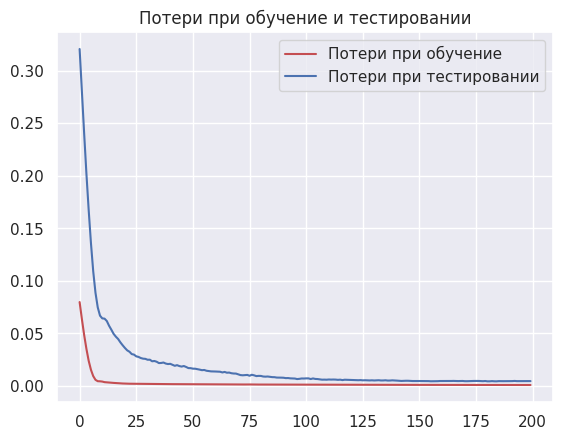

<Figure size 640x480 with 0 Axes>

In [115]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(loss))

plt.plot(epochs, loss, 'r', label='Потери при обучение')
plt.plot(epochs, val_loss, 'b', label='Потери при тестировании')
plt.title('Потери при обучение и тестировании')
plt.legend(loc=0)
plt.figure()


plt.show()

## Результаты

In [116]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)
train_predict.shape, test_predict.shape

train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)
original_ytrain = scaler.inverse_transform(y_train.reshape(-1,1)) 
original_ytest = scaler.inverse_transform(y_test.reshape(-1,1)) 

print("Train data RMSE: ", math.sqrt(mean_squared_error(original_ytrain,train_predict)))
print("Train data MSE: ", mean_squared_error(original_ytrain,train_predict))
print("Train data MAE: ", mean_absolute_error(original_ytrain,train_predict))
print("-------------------------------------------------------------------------------------")
print("Test data RMSE: ", math.sqrt(mean_squared_error(original_ytest,test_predict)))
print("Test data MSE: ", mean_squared_error(original_ytest,test_predict))
print("Test data MAE: ", mean_absolute_error(original_ytest,test_predict))

5/5 [==============================] - 0s 3ms/step
Train data RMSE:  8.793270429316369
Train data MSE:  77.32160484308967
Train data MAE:  6.502088452612547
-------------------------------------------------------------------------------------
Test data RMSE:  19.61896040389672
Test data MSE:  384.9036073296673
Test data MAE:  11.832598152493986


In [117]:
print("Train data explained variance regression score:", 
      explained_variance_score(original_ytrain, train_predict))
print("Test data explained variance regression score:", 
      explained_variance_score(original_ytest, test_predict))

print("Train data MGD: ", mean_gamma_deviance(original_ytrain, train_predict))
print("Test data MGD: ", mean_gamma_deviance(original_ytest, test_predict))
print("----------------------------------------------------------------------")
print("Train data MPD: ", mean_poisson_deviance(original_ytrain, train_predict))
print("Test data MPD: ", mean_poisson_deviance(original_ytest, test_predict))

Train data explained variance regression score: 0.84979825744782
Test data explained variance regression score: 0.9379886671579057
Train data MGD:  0.001239551513411128
Test data MGD:  0.002758897324521269
----------------------------------------------------------------------
Train data MPD:  0.3084828479382571
Test data MPD:  1.0129409769532969


In [118]:
look_back=time_step
trainPredictPlot = np.empty_like(closedf)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
print("Train predicted data: ", trainPredictPlot.shape)

# shift test predictions for plotting
testPredictPlot = np.empty_like(closedf)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(closedf)-1, :] = test_predict
print("Test predicted data: ", testPredictPlot.shape)

names = cycle(['Реальная Цена закрытия','Цена закрытия на тестовой выборке','Цена закрытия на тренировочной выборке'])


plotdf = pd.DataFrame({'date': close_stock['Date'],
                       'original_close': close_stock['Close'],
                      'train_predicted_close': trainPredictPlot.reshape(1,-1)[0].tolist(),
                      'test_predicted_close': testPredictPlot.reshape(1,-1)[0].tolist()})

fig = px.line(plotdf,x=plotdf['date'], y=[plotdf['original_close'],plotdf['train_predicted_close'],
                                          plotdf['test_predicted_close']],
              labels={'value':'Stock price','date': 'Date'})
fig.update_layout(title_text='Сравнение реальной и прогнозируемой цены акций',
                  plot_bgcolor='white', font_size=15, font_color='black', legend_title_text='Close Price')
fig.for_each_trace(lambda t:  t.update(name = next(names)))

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

Train predicted data:  (364, 1)
Test predicted data:  (364, 1)


## Построение модели на всем промежутке

In [99]:
df = pd.read_csv('BTC-USD-DAY-17.09.2014-06.03.2023.csv')
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100
...,...,...,...,...,...,...,...
3088,2023-03-02,23647.019531,23739.138672,23245.021484,23475.466797,23475.466797,20386398516
3089,2023-03-03,23476.632813,23479.347656,22213.238281,22362.679688,22362.679688,26062404610
3090,2023-03-04,22362.923828,22405.177734,22198.980469,22353.349609,22353.349609,11166012913
3091,2023-03-05,22354.144531,22613.685547,22307.142578,22435.513672,22435.513672,13317001733


In [100]:
closedf = df[['Date','Close']]
print("Shape of close dataframe:", closedf.shape)

Shape of close dataframe: (3093, 2)


In [101]:
fig = px.line(closedf, x=closedf.Date, y=closedf.Close,labels={'date':'Date','close':'Close Stock'})
fig.update_traces(marker_line_width=2, opacity=0.8, marker_line_color='orange')
fig.update_layout(title_text='Цена биткоина за 2015 год', plot_bgcolor='white', 
                  font_size=15, font_color='black')
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

In [102]:
close_stock = closedf.copy()
close_stock

,Date,Close
0,2014-09-17,457.334015
1,2014-09-18,424.440002
2,2014-09-19,394.795990
3,2014-09-20,408.903992
4,2014-09-21,398.821014
...,...,...
3088,2023-03-02,23475.466797
3089,2023-03-03,22362.679688
3090,2023-03-04,22353.349609
3091,2023-03-05,22435.513672


In [103]:
del closedf['Date']
scaler=MinMaxScaler(feature_range=(0,1))
closedf=scaler.fit_transform(np.array(closedf).reshape(-1,1))
print(closedf.shape)

(3093, 1)


In [104]:
training_size=int(len(closedf)*0.60)
test_size=len(closedf)-training_size
train_data, test_data = closedf[0:training_size, :], closedf[training_size:len(closedf), :1]
print("train_data: ", train_data.shape)
print("test_data: ", test_data.shape)

train_data:  (1855, 1)
test_data:  (1238, 1)


In [105]:
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

In [106]:
time_step = 15
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

print("X_train: ", X_train.shape)
print("y_train: ", y_train.shape)
print("X_test: ", X_test.shape)
print("y_test", y_test.shape)

X_train:  (1839, 15)
y_train:  (1839,)
X_test:  (1222, 15)
y_test (1222,)


In [107]:
# измените входные данные так, чтобы они были [данные, временной шаг, особенность], которые требуются для LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

print("X_train: ", X_train.shape)
print("X_test: ", X_test.shape)
print(X_train)

X_train:  (1839, 15, 1)
X_test:  (1222, 15, 1)
[[[0.00414359]
  [0.00365546]
  [0.00321557]
  ...
  [0.00292874]
  [0.00309905]
  [0.00304965]]

 [[0.00365546]
  [0.00321557]
  [0.00342492]
  ...
  [0.00309905]
  [0.00304965]
  [0.00292288]]

 [[0.00321557]
  [0.00342492]
  [0.0032753 ]
  ...
  [0.00304965]
  [0.00292288]
  [0.00269198]]

 ...

 [[0.11980851]
  [0.1197205 ]
  [0.11761734]
  ...
  [0.12491166]
  [0.12477415]
  [0.12084594]]

 [[0.1197205 ]
  [0.11761734]
  [0.12043209]
  ...
  [0.12477415]
  [0.12084594]
  [0.12106554]]

 [[0.11761734]
  [0.12043209]
  [0.12116527]
  ...
  [0.12084594]
  [0.12106554]
  [0.1208348 ]]]


In [108]:
model=Sequential()

model.add(LSTM(10,input_shape=(None,1),activation="relu"))

model.add(Dense(1))

model.compile(loss="mean_squared_error",optimizer="adam")

In [109]:
history = model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=200,batch_size=32,verbose=1)

Epoch 1/200
58/58 [==============================] - 2s 13ms/step - loss: 0.0023 - val_loss: 0.0698
Epoch 2/200
58/58 [==============================] - 0s 8ms/step - loss: 7.9304e-04 - val_loss: 0.9622
Epoch 3/200
58/58 [==============================] - 1s 9ms/step - loss: 1.0925e-04 - val_loss: 0.6096
Epoch 4/200
58/58 [==============================] - 0s 8ms/step - loss: 8.9744e-05 - val_loss: 0.2293
Epoch 5/200
58/58 [==============================] - 1s 9ms/step - loss: 8.6698e-05 - val_loss: 0.1016
Epoch 6/200
58/58 [==============================] - 1s 9ms/step - loss: 7.9914e-05 - val_loss: 0.0629
Epoch 7/200
58/58 [==============================] - 0s 8ms/step - loss: 7.8882e-05 - val_loss: 0.0436
Epoch 8/200
58/58 [==============================] - 1s 9ms/step - loss: 7.6651e-05 - val_loss: 0.0291
Epoch 9/200
58/58 [==============================] - 1s 11ms/step - loss: 7.6128e-05 - val_loss: 0.0227
Epoch 10/200
58/58 [==============================] - 1s 9ms/step - loss: 7

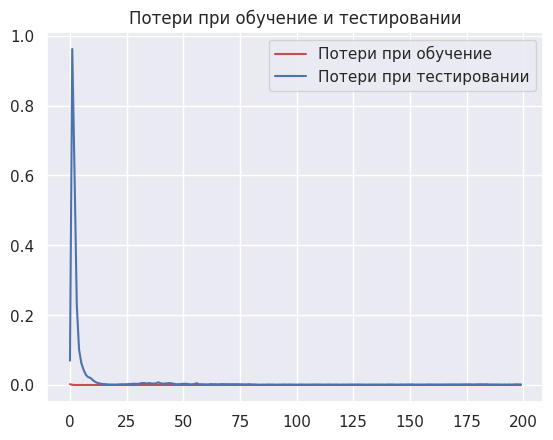

<Figure size 640x480 with 0 Axes>

In [110]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(loss))

plt.plot(epochs, loss, 'r', label='Потери при обучение')
plt.plot(epochs, val_loss, 'b', label='Потери при тестировании')
plt.title('Потери при обучение и тестировании')
plt.legend(loc=0)
plt.figure()


plt.show()

## Результаты

In [111]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)
train_predict.shape, test_predict.shape

train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)
original_ytrain = scaler.inverse_transform(y_train.reshape(-1,1)) 
original_ytest = scaler.inverse_transform(y_test.reshape(-1,1)) 

print("Train data RMSE: ", math.sqrt(mean_squared_error(original_ytrain,train_predict)))
print("Train data MSE: ", mean_squared_error(original_ytrain,train_predict))
print("Train data MAE: ", mean_absolute_error(original_ytrain,train_predict))
print("-------------------------------------------------------------------------------------")
print("Test data RMSE: ", math.sqrt(mean_squared_error(original_ytest,test_predict)))
print("Test data MSE: ", mean_squared_error(original_ytest,test_predict))
print("Test data MAE: ", mean_absolute_error(original_ytest,test_predict))

39/39 [==============================] - 0s 2ms/step
Train data RMSE:  289.62087477925655
Train data MSE:  83880.2511079018
Train data MAE:  149.07185718481563
-------------------------------------------------------------------------------------
Test data RMSE:  2754.827452341865
Test data MSE:  7589074.292176371
Test data MAE:  1759.2290099529457


In [112]:
print("Train data explained variance regression score:", 
      explained_variance_score(original_ytrain, train_predict))
print("Test data explained variance regression score:", 
      explained_variance_score(original_ytest, test_predict))

print("Train data MGD: ", mean_gamma_deviance(original_ytrain, train_predict))
print("Test data MGD: ", mean_gamma_deviance(original_ytest, test_predict))
print("----------------------------------------------------------------------")
print("Train data MPD: ", mean_poisson_deviance(original_ytrain, train_predict))
print("Test data MPD: ", mean_poisson_deviance(original_ytest, test_predict))

Train data explained variance regression score: 0.9948363561758405
Test data explained variance regression score: 0.9829661219051731
Train data MGD:  0.02697626387421441
Test data MGD:  0.004602417829145621
----------------------------------------------------------------------
Train data MPD:  14.882952327867434
Test data MPD:  175.0442537915586


In [113]:
look_back=time_step
trainPredictPlot = np.empty_like(closedf)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
print("Train predicted data: ", trainPredictPlot.shape)

# shift test predictions for plotting
testPredictPlot = np.empty_like(closedf)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(closedf)-1, :] = test_predict
print("Test predicted data: ", testPredictPlot.shape)

names = cycle(['Реальная Цена закрытия','Цена закрытия на тестовой выборке','Цена закрытия на тренировочной выборке'])


plotdf = pd.DataFrame({'date': close_stock['Date'],
                       'original_close': close_stock['Close'],
                      'train_predicted_close': trainPredictPlot.reshape(1,-1)[0].tolist(),
                      'test_predicted_close': testPredictPlot.reshape(1,-1)[0].tolist()})

fig = px.line(plotdf,x=plotdf['date'], y=[plotdf['original_close'],plotdf['train_predicted_close'],
                                          plotdf['test_predicted_close']],
              labels={'value':'Stock price','date': 'Date'})
fig.update_layout(title_text='Сравнение реальной и прогнозируемой цены акций',
                  plot_bgcolor='white', font_size=15, font_color='black', legend_title_text='Close Price')
fig.for_each_trace(lambda t:  t.update(name = next(names)))

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

Train predicted data:  (3093, 1)
Test predicted data:  (3093, 1)


## Построение модели с несколькими входными признакими

In [67]:
df = pd.read_csv('BTC-USD-DAY-17.09.2014-06.03.2023.csv')
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100
...,...,...,...,...,...,...,...
3088,2023-03-02,23647.019531,23739.138672,23245.021484,23475.466797,23475.466797,20386398516
3089,2023-03-03,23476.632813,23479.347656,22213.238281,22362.679688,22362.679688,26062404610
3090,2023-03-04,22362.923828,22405.177734,22198.980469,22353.349609,22353.349609,11166012913
3091,2023-03-05,22354.144531,22613.685547,22307.142578,22435.513672,22435.513672,13317001733


In [68]:
closedf = df[['Date','Close', 'Open', 'High', 'Low', 'Volume']]
print("Shape of close dataframe:", closedf.shape)

Shape of close dataframe: (3093, 6)


In [69]:
close_stock = closedf.copy()
close_stock

,Date,Close,Open,High,Low,Volume
0,2014-09-17,457.334015,465.864014,468.174011,452.421997,21056800
1,2014-09-18,424.440002,456.859985,456.859985,413.104004,34483200
2,2014-09-19,394.795990,424.102997,427.834991,384.532013,37919700
3,2014-09-20,408.903992,394.673004,423.295990,389.882996,36863600
4,2014-09-21,398.821014,408.084991,412.425995,393.181000,26580100
...,...,...,...,...,...,...
3088,2023-03-02,23475.466797,23647.019531,23739.138672,23245.021484,20386398516
3089,2023-03-03,22362.679688,23476.632813,23479.347656,22213.238281,26062404610
3090,2023-03-04,22353.349609,22362.923828,22405.177734,22198.980469,11166012913
3091,2023-03-05,22435.513672,22354.144531,22613.685547,22307.142578,13317001733


In [70]:
del closedf['Date']
scaler=MinMaxScaler(feature_range=(0,1))
closedf=scaler.fit_transform(np.array(closedf).reshape(-1,5))
print(closedf.shape)

(3093, 5)


In [71]:
training_size=int(len(closedf)*0.60)
val_size=int((len(closedf)-training_size)*0.5)
test_size=int((len(closedf)-training_size)*0.5)
train_data,val_data,test_data=closedf[0:training_size,:],closedf[training_size:training_size+val_size,:],closedf[training_size+val_size:len(closedf),:]
print("train_data: ", train_data.shape)
print("val_data: ", val_data.shape)
print("test_data: ", test_data.shape)

train_data:  (1855, 5)
val_data:  (619, 5)
test_data:  (619, 5)


**Прогнозирование на 1 день вперед**

In [31]:
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), :]   ###i=0, 0,1,2,3-----99   100 
        dataX.append(a)
        dataY.append([dataset[i + time_step, 3]])
    return np.array(dataX), np.array(dataY)

In [32]:
time_step = 15
X_train, y_train = create_dataset(train_data, time_step)
X_val, y_val = create_dataset(val_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

print("X_train: ", X_train.shape)
print("y_train: ", y_train.shape)
print("X_val: ", X_val.shape)
print("y_val: ", y_val.shape)
print("X_test: ", X_test.shape)
print("y_test", y_test.shape)

X_train:  (1839, 15, 5)
y_train:  (1839, 1)
X_val:  (603, 15, 5)
y_val:  (603, 1)
X_test:  (603, 15, 5)
y_test (603, 1)


**Прогнозирование на несколько дней вперед**

In [72]:
# convert an array of values into a dataset matrix

def create_dataset(dataset, time_step=1,label_width=0):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-label_width-1):
        a = dataset[i:(i+time_step), :]   ###i=0, 0,1,2,3-----99   100 
        dataX.append(a)
        dataY.append([dataset[i + time_step+label_width-1, 3]])
    return np.array(dataX), np.array(dataY)

In [73]:
time_step = 15
label_width = 5
X_train, y_train = create_dataset(train_data, time_step=time_step, label_width=label_width)
X_val, y_val = create_dataset(val_data, time_step=time_step, label_width=label_width)
X_test, y_test = create_dataset(test_data,  time_step=time_step, label_width=label_width)

print("X_train: ", X_train.shape)
print("y_train: ", y_train.shape)
print("X_val: ", X_val.shape)
print("y_val: ", y_val.shape)
print("X_test: ", X_test.shape)
print("y_test", y_test.shape)

X_train:  (1834, 15, 5)
y_train:  (1834, 1)
X_val:  (598, 15, 5)
y_val:  (598, 1)
X_test:  (598, 15, 5)
y_test (598, 1)


In [74]:
model=Sequential()

model.add(LSTM(16,return_sequences = False,activation="relu"))

model.add(Dense(1))

model.compile(loss="mean_squared_error",optimizer="adam")

In [75]:
checkpoint = tf.keras.callbacks.ModelCheckpoint("best_model",
                                            save_best_only=True)
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                    patience=8,
                                                    mode='min')
history = model.fit(X_train,y_train,validation_data=(X_val,y_val),epochs=100,batch_size=32,verbose=1,
                    callbacks=[early_stopping, checkpoint])

Epoch 1/100
57/58 [============================>.] - ETA: 0s - loss: 0.0023

58/58 [==============================] - 5s 67ms/step - loss: 0.0023 - val_loss: 0.0305
Epoch 2/100
58/58 [==============================] - 1s 10ms/step - loss: 1.7693e-04 - val_loss: 0.0460
Epoch 3/100
51/58 [=========================>....] - ETA: 0s - loss: 1.4441e-04

58/58 [==============================] - 3s 45ms/step - loss: 1.4232e-04 - val_loss: 0.0159
Epoch 4/100
56/58 [===========================>..] - ETA: 0s - loss: 1.3392e-04

58/58 [==============================] - 2s 36ms/step - loss: 1.3223e-04 - val_loss: 0.0058
Epoch 5/100
52/58 [=========================>....] - ETA: 0s - loss: 1.2180e-04

58/58 [==============================] - 2s 35ms/step - loss: 1.2269e-04 - val_loss: 0.0041
Epoch 6/100
51/58 [=========================>....] - ETA: 0s - loss: 1.1163e-04

58/58 [==============================] - 2s 43ms/step - loss: 1.1737e-04 - val_loss: 0.0031
Epoch 7/100
54/58 [==========================>...] - ETA: 0s - loss: 1.1757e-04

58/58 [==============================] - 2s 35ms/step - loss: 1.1997e-04 - val_loss: 0.0028
Epoch 8/100
58/58 [==============================] - 0s 7ms/step - loss: 1.1162e-04 - val_loss: 0.0029
Epoch 9/100
58/58 [==============================] - 0s 7ms/step - loss: 1.0938e-04 - val_loss: 0.0037
Epoch 10/100
58/58 [==============================] - 0s 8ms/step - loss: 1.0982e-04 - val_loss: 0.0059
Epoch 11/100
58/58 [==============================] - 0s 8ms/step - loss: 1.0703e-04 - val_loss: 0.0043
Epoch 12/100
58/58 [==============================] - 0s 7ms/step - loss: 1.0211e-04 - val_loss: 0.0090
Epoch 13/100
58/58 [==============================] - 0s 7ms/step - loss: 1.0288e-04 - val_loss: 0.0060
Epoch 14/100
58/58 [==============================] - 0s 7ms/step - loss: 1.0434e-04 - val_loss: 0.0096
Epoch 15/100
58/58 [==============================] - 0s 8ms/step - loss: 1.0193e-04 - val_loss: 0.0131


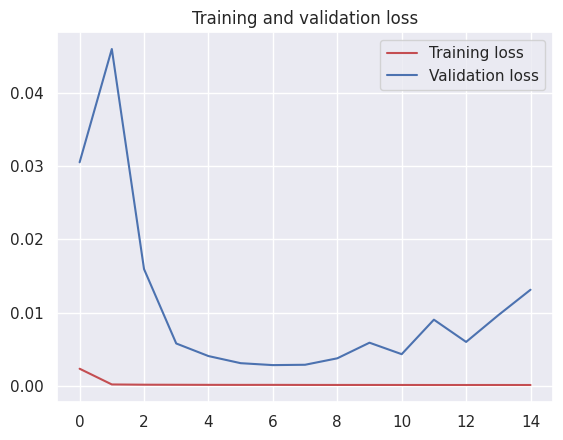

<Figure size 640x480 with 0 Axes>

In [76]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(loss))

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend(loc=0)
plt.figure()


plt.show()
#Потери при обучение в сравнении с потерями при проверке

## Результаты

In [77]:
new_model = tf.keras.models.load_model('best_model')

In [78]:
train_predict=new_model.predict(X_train)
test_predict=new_model.predict(X_test)
train_predict.shape, test_predict.shape

19/19 [==============================] - 0s 2ms/step


((1834, 1), (598, 1))

In [79]:
val_predict=new_model.predict(X_val)

19/19 [==============================] - 0s 2ms/step


In [80]:
df_test = pd.read_csv('BTC-USD-DAY-17.09.2014-06.03.2023.csv')
scaler1=MinMaxScaler()
scaler1.fit_transform(np.array(df_test['Close']).reshape(-1,1))

array([[0.00414359],
       [0.00365546],
       [0.00321557],
       ...,
       [0.32906464],
       [0.3302839 ],
       [0.33033659]])

In [81]:
train_predict = scaler1.inverse_transform(train_predict)
test_predict = scaler1.inverse_transform(test_predict)
original_ytrain = scaler1.inverse_transform(y_train.reshape(-1,1)) 
original_ytest = scaler1.inverse_transform(y_test.reshape(-1,1)) 
val_predict=scaler1.inverse_transform(val_predict)
original_yval=scaler1.inverse_transform(y_val.reshape(-1,1))

In [82]:
print("Train data RMSE: ", math.sqrt(mean_squared_error(original_ytrain,train_predict)))
print("Train data MSE: ", mean_squared_error(original_ytrain,train_predict))
print("Train data MAE: ", mean_absolute_error(original_ytrain,train_predict))
print("-------------------------------------------------------------------------------------")
print("Test data RMSE: ", math.sqrt(mean_squared_error(original_ytest,test_predict)))
print("Test data MSE: ", mean_squared_error(original_ytest,test_predict))
print("Test data MAE: ", mean_absolute_error(original_ytest,test_predict))

Train data RMSE:  708.389642389623
Train data MSE:  501815.8854448979
Train data MAE:  344.22309158118264
-------------------------------------------------------------------------------------
Test data RMSE:  4201.313764121937
Test data MSE:  17651037.344600443
Test data MAE:  3303.036458045975


In [83]:
print("Validation data RMSE: ", math.sqrt(mean_squared_error(original_yval,val_predict)))
print("Validation data MSE: ", mean_squared_error(original_yval,val_predict))
print("Validation data MAE: ", mean_absolute_error(original_yval,val_predict))

Validation data RMSE:  3578.4723068350318
Validation data MSE:  12805464.050785232
Validation data MAE:  2201.6036414196706


In [84]:
print("Train data explained variance regression score:", 
      explained_variance_score(original_ytrain[:,0], train_predict[:,0],force_finite=False))
print("Test data explained variance regression score:", 
      explained_variance_score(original_ytest[:,0], test_predict[:,0],force_finite=False))

Train data explained variance regression score: 0.966188309346197
Test data explained variance regression score: 0.943139027921843


In [85]:
print("Train data MGD: ", mean_gamma_deviance(original_ytrain[:,0], train_predict[:,0]))
print("Test data MGD: ", mean_gamma_deviance(original_ytest[:,0], test_predict[:,0]))
print("----------------------------------------------------------------------")
print("Train data MPD: ", mean_poisson_deviance(original_ytrain[:,0], train_predict[:,0]))
print("Test data MPD: ", mean_poisson_deviance(original_ytest[:,0], test_predict[:,0]))

Train data MGD:  0.016514915382913
Test data MGD:  0.016930903420576255
----------------------------------------------------------------------
Train data MPD:  58.81083262448943
Test data MPD:  510.4499611721536


In [98]:
df1 = pd.read_csv("https://github.com/BitUpTeam/BitUp/blob/main/BTC-USD-DAY-17.09.2014-06.03.2023.csv?raw=true", index_col = 'Date', parse_dates = True)
closedf=closedf[:,0].reshape([-1,1])
look_back=time_step
look_forward=label_width
# shift train predictions for plotting
trainPredictPlot = np.empty_like(closedf)
trainPredictPlot[:,] = np.nan
trainPredictPlot[look_back+look_forward:len(train_predict)+
                 look_back+look_forward, :] = train_predict
print("Train predicted data: ", trainPredictPlot.shape)

# shift validation predictions for plotting
valPredictPlot = np.empty_like(closedf)
valPredictPlot[:, :] = np.nan
valPredictPlot[len(train_predict)+(look_back*2)+(look_forward*2)+1:len(train_predict)+
               (look_back*2)+(look_forward*2)+len(val_predict)+1, :] = val_predict
print("Validation predicted data: ", valPredictPlot.shape)

# shift test predictions for plotting
testPredictPlot = np.empty_like(closedf)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*3)+(look_forward*3)+
                len(val_predict)+2:len(closedf)-1, :] = test_predict
print("Test predicted data: ", testPredictPlot.shape)

names = cycle(['Original close price','Train predicted close price','Validation predicted close price','Test predicted close price'])


plotdf = pd.DataFrame({'date': df1.index,
                       'original_close': df1['Close'],
                      'train_predicted_close': trainPredictPlot.reshape(1,-1)[0].tolist(),
                      'val_predicted_close': valPredictPlot.reshape(1,-1)[0].tolist(),
                      'test_predicted_close': testPredictPlot.reshape(1,-1)[0].tolist()})

fig = px.line(plotdf,x=plotdf['date'], y=[plotdf['original_close'],plotdf['train_predicted_close'],
                                          plotdf['val_predicted_close'],plotdf['test_predicted_close']],
              labels={'value':'Stock price','date': 'Date'})
fig.update_layout(title_text='Comparision between original close price vs predicted close price',
                  plot_bgcolor='white', font_size=15, font_color='black', legend_title_text='Close Price')
fig.for_each_trace(lambda t:  t.update(name = next(names)))

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

Train predicted data:  (3093, 1)
Validation predicted data:  (3093, 1)
Test predicted data:  (3093, 1)


# Сравнение цены Bitcoin с другими активами

## Сравнение с золтом

In [ ]:
files.upload()

Проведем сравнение цены еще одно дефелиционного актива, такого как золото

In [4]:
df = pd.read_csv('BTC-USD-DAY-17.09.2014-06.03.2023.csv')
gold = pd.read_csv('gold.csv')

In [5]:
gold['Date'] = pd.to_datetime(gold['Date'], format='%m/%d/%Y')
gold['Bitcoin'] = df['Close']

In [6]:
gold = gold.loc[(gold['Date'] >= '2014-09-17') & (gold['Date'] < '2023-03-06')]
gold

,Date,Close/Last,Volume,Open,High,Low,Bitcoin
26,2023-03-03,1854.6,152535.0,1842.1,1864.4,1842.0,390.414001
27,2023-03-02,1840.5,135493.0,1843.8,1845.3,1835.9,400.869995
28,2023-03-01,1845.4,179501.0,1834.0,1852.5,1829.6,394.773010
29,2023-02-28,1836.7,175222.0,1823.9,1838.6,1810.8,382.556000
30,2023-02-27,1824.9,127138.0,1818.0,1827.3,1812.0,383.757996
...,...,...,...,...,...,...,...
2163,2014-09-23,1222.0,147771.0,1214.9,1237.0,1214.7,11758.283203
2164,2014-09-22,1217.9,129276.0,1216.4,1221.0,1208.8,11878.372070
2165,2014-09-19,1216.6,169456.0,1225.6,1229.2,1214.2,11592.489258
2166,2014-09-18,1226.9,139959.0,1223.1,1228.7,1216.3,11681.825195


In [7]:
from sklearn.preprocessing import MinMaxScaler

scaler_mm = MinMaxScaler()
gold[['mm_Close/Last', 'mm_Bitcoin']] = scaler_mm.fit_transform(gold[['Close/Last', 'Bitcoin']])
gold = gold.reset_index(drop=True) # сбрасываем индексы
gold['mm_Bitcoin'] = gold.loc[::-1,'mm_Bitcoin'].reset_index(drop=True) # разворачиваем столбец

gold.head()

,Date,Close/Last,Volume,Open,High,Low,Bitcoin,mm_Close/Last,mm_Bitcoin
0,2023-03-03,1854.6,152535.0,1842.1,1864.4,1842.0,390.414001,0.789370,0.594574
1,2023-03-02,1840.5,135493.0,1843.8,1845.3,1835.9,400.869995,0.775544,0.595452
2,2023-03-01,1845.4,179501.0,1834.0,1852.5,1829.6,394.773010,0.780349,0.590828
3,2023-02-28,1836.7,175222.0,1823.9,1838.6,1810.8,382.556000,0.771818,0.605626
4,2023-02-27,1824.9,127138.0,1818.0,1827.3,1812.0,383.757996,0.760247,0.599410


In [8]:
names = cycle(['Цена золота','Цена Bitcoin'])

fig = px.line(gold,x=gold['Date'], y=[gold['mm_Close/Last'],gold['mm_Bitcoin']],
              labels={'value':'Stock price','date': 'Date'})
fig.update_layout(title_text='Сравнение цен биткоина и золота',
                  plot_bgcolor='white', font_size=15, font_color='black', legend_title_text='Close Price')
fig.for_each_trace(lambda t:  t.update(name = next(names)))

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

Рассмотрим подробнее до 2018 года

In [9]:
goldUntil2018 = gold.loc[(gold['Date'] < '2019-01-01')]

goldUntil2018[['mm_Close/Last', 'mm_Bitcoin']] = scaler_mm.fit_transform(goldUntil2018[['Close/Last', 'Bitcoin']])
goldUntil2018

<ipython-input-9-bf7f2a440775>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Date,Close/Last,Volume,Open,High,Low,Bitcoin,mm_Close/Last,mm_Bitcoin
1050,2018-12-31,1281.3,108913.0,1283.0,1286.5,1279.7,4382.660156,0.717337,0.075124
1051,2018-12-28,1283.0,155354.0,1278.0,1284.7,1276.5,4579.020020,0.722601,0.087139
1052,2018-12-27,1281.1,200717.0,1270.1,1281.6,1269.1,4565.299805,0.716718,0.086300
1053,2018-12-26,1273.0,198175.0,1273.5,1282.3,1267.4,4703.390137,0.691641,0.094750
1054,2018-12-24,1271.8,130455.0,1260.7,1273.9,1260.0,4892.009766,0.687926,0.106291
...,...,...,...,...,...,...,...,...,...
2137,2014-09-23,1222.0,147771.0,1214.9,1237.0,1214.7,11758.283203,0.533746,0.526441
2138,2014-09-22,1217.9,129276.0,1216.4,1221.0,1208.8,11878.372070,0.521053,0.533789
2139,2014-09-19,1216.6,169456.0,1225.6,1229.2,1214.2,11592.489258,0.517028,0.516296
2140,2014-09-18,1226.9,139959.0,1223.1,1228.7,1216.3,11681.825195,0.548916,0.521762


In [10]:
names = cycle(['Цена золота','Цена Bitcoin'])

fig = px.line(goldUntil2018,x=goldUntil2018['Date'], y=[goldUntil2018['mm_Close/Last'],goldUntil2018['mm_Bitcoin']],
              labels={'value':'Stock price','date': 'Date'})
fig.update_layout(title_text='Comparision between original close price vs predicted close price',
                  plot_bgcolor='white', font_size=15, font_color='black', legend_title_text='Close Price')
fig.for_each_trace(lambda t:  t.update(name = next(names)))

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

## Сравнение с долларом

In [11]:
files.upload()

{}

In [12]:
btc = pd.read_csv('BTC-CNY.csv')
usd = pd.read_csv('USD-CNY.csv')


In [13]:
usd = usd.loc[(usd['Date'] >= '2014-09-17') & (usd['Date'] < '2023-03-06')]


In [14]:
usd['Bitcoin'] = btc['Close']
usd

,Date,Open,High,Low,Close,Adj Close,Volume,Bitcoin
185,2014-09-17,6.1361,6.1440,6.1290,6.1361,6.1361,0.0,1613.117065
186,2014-09-18,6.1290,6.1385,6.1290,6.1290,6.1290,0.0,1662.343384
187,2014-09-19,6.1305,6.1420,6.1272,6.1305,6.1305,0.0,1657.388916
188,2014-09-22,6.1311,6.1420,6.1281,6.1311,6.1311,0.0,1523.818726
189,2014-09-23,6.1305,6.1390,6.1278,6.1305,6.1305,0.0,1529.277344
...,...,...,...,...,...,...,...,...
2388,2023-02-27,6.9550,6.9722,6.9418,6.9550,6.9550,0.0,387987.625000
2389,2023-02-28,6.9439,6.9476,6.9208,6.9439,6.9439,0.0,390006.468750
2390,2023-03-01,6.9323,6.9324,6.8615,6.9323,6.9323,0.0,378313.531250
2391,2023-03-02,6.8680,6.9172,6.8680,6.8680,6.8680,0.0,385896.812500


In [15]:
names = cycle(['Цена золота','Цена Bitcoin'])

fig = px.line(usd,x=usd['Date'], y=[usd['Close'],usd['Bitcoin']],
              labels={'value':'Stock price','date': 'Date'})
fig.update_layout(title_text='Сравнение цен биткоина и золота',
                  plot_bgcolor='white', font_size=15, font_color='black', legend_title_text='Close Price')
fig.for_each_trace(lambda t:  t.update(name = next(names)))

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

In [16]:

usd[['mm_Close', 'mm_Bitcoin']] = scaler_mm.fit_transform(usd[['Close', 'Bitcoin']])
usd

,Date,Open,High,Low,Close,Adj Close,Volume,Bitcoin,mm_Close,mm_Bitcoin
185,2014-09-17,6.1361,6.1440,6.1290,6.1361,6.1361,0.0,1613.117065,0.029020,0.000668
186,2014-09-18,6.1290,6.1385,6.1290,6.1290,6.1290,0.0,1662.343384,0.023117,0.000792
187,2014-09-19,6.1305,6.1420,6.1272,6.1305,6.1305,0.0,1657.388916,0.024364,0.000779
188,2014-09-22,6.1311,6.1420,6.1281,6.1311,6.1311,0.0,1523.818726,0.024863,0.000443
189,2014-09-23,6.1305,6.1390,6.1278,6.1305,6.1305,0.0,1529.277344,0.024364,0.000457
...,...,...,...,...,...,...,...,...,...,...
2388,2023-02-27,6.9550,6.9722,6.9418,6.9550,6.9550,0.0,387987.625000,0.709962,0.973284
2389,2023-02-28,6.9439,6.9476,6.9208,6.9439,6.9439,0.0,390006.468750,0.700732,0.978366
2390,2023-03-01,6.9323,6.9324,6.8615,6.9323,6.9323,0.0,378313.531250,0.691086,0.948932
2391,2023-03-02,6.8680,6.9172,6.8680,6.8680,6.8680,0.0,385896.812500,0.637618,0.968021


In [19]:
names = cycle(['Цена Доллара','Цена Bitcoin'])

fig = px.line(usd,x=usd['Date'], y=[usd['mm_Close'],usd['mm_Bitcoin']],
              labels={'value':'Stock price','date': 'Date'})
fig.update_layout(title_text='Сравнение цен биткоина и доллара',
                  plot_bgcolor='white', font_size=15, font_color='black', legend_title_text='Close Price')
fig.for_each_trace(lambda t:  t.update(name = next(names)))

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

In [24]:
usdUntil2018 = usd.loc[(usd['Date'] < '2019-01-01')]

usdUntil2018[['mm_Close/Last', 'mm_Bitcoin']] = scaler_mm.fit_transform(usdUntil2018[['Close', 'Bitcoin']])
usdUntil2018

<ipython-input-24-5e17ef310799>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Date,Open,High,Low,Close,Adj Close,Volume,Bitcoin,mm_Close,mm_Bitcoin,mm_Close/Last
185,2014-09-17,6.1361,6.1440,6.1290,6.1361,6.1361,0.0,1613.117065,0.029020,0.002081,0.039954
186,2014-09-18,6.1290,6.1385,6.1290,6.1290,6.1290,0.0,1662.343384,0.023117,0.002467,0.031826
187,2014-09-19,6.1305,6.1420,6.1272,6.1305,6.1305,0.0,1657.388916,0.024364,0.002428,0.033543
188,2014-09-22,6.1311,6.1420,6.1281,6.1311,6.1311,0.0,1523.818726,0.024863,0.001381,0.034230
189,2014-09-23,6.1305,6.1390,6.1278,6.1305,6.1305,0.0,1529.277344,0.024364,0.001423,0.033543
...,...,...,...,...,...,...,...,...,...,...,...
1299,2018-12-25,6.8981,6.8983,6.8756,6.8981,6.8981,0.0,44279.781250,0.662648,0.336704,0.912307
1300,2018-12-26,6.8983,6.8984,6.8811,6.8983,6.8983,0.0,42679.296875,0.662814,0.324152,0.912536
1301,2018-12-27,6.8981,6.8984,6.8556,6.8981,6.8981,0.0,42920.925781,0.662648,0.326047,0.912307
1302,2018-12-28,6.8653,6.8775,6.8445,6.8653,6.8653,0.0,43660.007813,0.635373,0.331843,0.874757


In [25]:
names = cycle(['Цена Доллара','Цена Bitcoin'])

fig = px.line(usdUntil2018,x=usdUntil2018['Date'], y=[usdUntil2018['mm_Close'],usdUntil2018['mm_Bitcoin']],
              labels={'value':'Stock price','date': 'Date'})
fig.update_layout(title_text='Сравнение цен биткоина и доллара',
                  plot_bgcolor='white', font_size=15, font_color='black', legend_title_text='Close Price')
fig.for_each_trace(lambda t:  t.update(name = next(names)))

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

## Вывод

Данные активы ни как недостаточно связаны с биткоином, чтобы использовать их для предсказания цены в нейронной сети.

Но можно попробовать их использовать для МЛ.

.

.

.

.

.

.

.

.





















/

In [ ]:
# test = y_2015.groupby(y_2015['Date'].dt.month)
# for key, item in test:
#     print(test.get_group(key), "\n\n")

In [ ]:

close_stock = closedf.copy()
close_stock

,Date,Close
0,2014-09-17,457.334015
1,2014-09-18,424.440002
2,2014-09-19,394.795990
3,2014-09-20,408.903992
4,2014-09-21,398.821014
...,...,...
3088,2023-03-02,23475.466797
3089,2023-03-03,22362.679688
3090,2023-03-04,22353.349609
3091,2023-03-05,22435.513672


In [ ]:
fig = px.line(closedf, x=closedf.Date, y=closedf.Close,labels={'date':'Date','close':'Close Stock'})
fig.update_traces(marker_line_width=2, opacity=0.8, marker_line_color='orange')
fig.update_layout(title_text='Considered period to predict Bitcoin close price', 
                  plot_bgcolor='white', font_size=15, font_color='black')
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

In [ ]:
del closedf['Date']
scaler=MinMaxScaler(feature_range=(0,1))
closedf=scaler.fit_transform(np.array(closedf).reshape(-1,1))
print(closedf.shape)

(3093, 1)


In [ ]:
training_size=int(len(closedf)*0.60)
test_size=len(closedf)-training_size
train_data,test_data=closedf[0:training_size,:],closedf[training_size:len(closedf),:1]
print("train_data: ", train_data.shape)
print("test_data: ", test_data.shape)

train_data:  (1855, 1)
test_data:  (1238, 1)


In [ ]:
# convert an array of values into a dataset matrix

def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

In [ ]:
time_step = 15
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

print("X_train: ", X_train.shape)
print("y_train: ", y_train.shape)
print("X_test: ", X_test.shape)
print("y_test", y_test.shape)

X_train:  (1839, 15)
y_train:  (1839,)
X_test:  (1222, 15)
y_test (1222,)


In [ ]:
# измените входные данные так, чтобы они были [данные, временной шаг, особенность], которые требуются для LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

print("X_train: ", X_train.shape)
print("X_test: ", X_test.shape)
print(X_train)

X_train:  (1839, 15, 1)
X_test:  (1222, 15, 1)
[[[0.00414359]
  [0.00365546]
  [0.00321557]
  ...
  [0.00292874]
  [0.00309905]
  [0.00304965]]

 [[0.00365546]
  [0.00321557]
  [0.00342492]
  ...
  [0.00309905]
  [0.00304965]
  [0.00292288]]

 [[0.00321557]
  [0.00342492]
  [0.0032753 ]
  ...
  [0.00304965]
  [0.00292288]
  [0.00269198]]

 ...

 [[0.11980851]
  [0.1197205 ]
  [0.11761734]
  ...
  [0.12491166]
  [0.12477415]
  [0.12084594]]

 [[0.1197205 ]
  [0.11761734]
  [0.12043209]
  ...
  [0.12477415]
  [0.12084594]
  [0.12106554]]

 [[0.11761734]
  [0.12043209]
  [0.12116527]
  ...
  [0.12084594]
  [0.12106554]
  [0.1208348 ]]]


In [ ]:
model=Sequential()

model.add(LSTM(10,input_shape=(None,1),activation="relu"))

model.add(Dense(1))

model.compile(loss="mean_squared_error",optimizer="adam")

In [ ]:
history = model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=200,batch_size=32,verbose=1)

Epoch 1/200
58/58 [==============================] - 2s 12ms/step - loss: 0.0020 - val_loss: 0.0903
Epoch 2/200
58/58 [==============================] - 1s 9ms/step - loss: 7.9897e-04 - val_loss: 0.0168
Epoch 3/200
58/58 [==============================] - 1s 9ms/step - loss: 1.3633e-04 - val_loss: 0.0106
Epoch 4/200
58/58 [==============================] - 1s 9ms/step - loss: 6.8108e-05 - val_loss: 0.0091
Epoch 5/200
58/58 [==============================] - 1s 9ms/step - loss: 6.5504e-05 - val_loss: 0.0048
Epoch 6/200
58/58 [==============================] - 0s 9ms/step - loss: 6.3595e-05 - val_loss: 0.0036
Epoch 7/200
58/58 [==============================] - 0s 8ms/step - loss: 6.3363e-05 - val_loss: 0.0025
Epoch 8/200
58/58 [==============================] - 1s 10ms/step - loss: 6.1959e-05 - val_loss: 0.0018
Epoch 9/200
58/58 [==============================] - 1s 9ms/step - loss: 6.4174e-05 - val_loss: 0.0019
Epoch 10/200
58/58 [==============================] - 0s 8ms/step - loss: 6

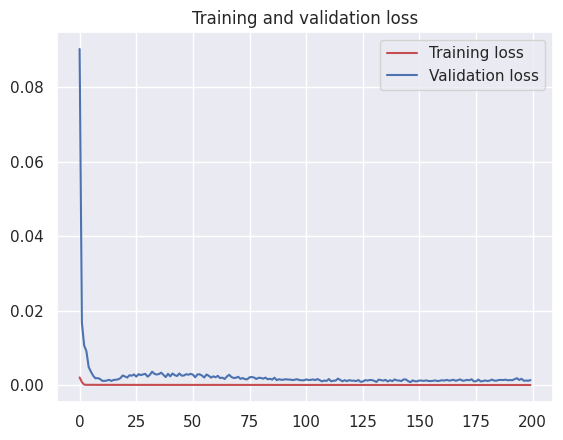

<Figure size 640x480 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(loss))

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend(loc=0)
plt.figure()


plt.show()
#Потери при обучение в сравнении с потерями при проверке

In [ ]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)
train_predict.shape, test_predict.shape

39/39 [==============================] - 0s 2ms/step


((1839, 1), (1222, 1))

# Предсказание на след 30 дней (пока не работает)

In [ ]:
x_input=test_data[len(test_data)-time_step:].reshape(1,-1)
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

from numpy import array

lst_output=[]
n_steps=time_step
i=0
pred_days = 30
while(i<pred_days):
    
    if(len(temp_input)>time_step):
        
        x_input=np.array(temp_input[1:])
        #print("{} day input {}".format(i,x_input))
        x_input = x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        
        yhat = model.predict(x_input, verbose=0)
        #print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
       
        lst_output.extend(yhat.tolist())
        i=i+1
        
    else:
        
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        temp_input.extend(yhat[0].tolist())
        
        lst_output.extend(yhat.tolist())
        i=i+1
               
print("Output of predicted next days: ", len(lst_output))


Output of predicted next days:  30


In [ ]:
last_days=np.arange(1,time_step+1)
day_pred=np.arange(time_step+1,time_step+pred_days+1)
print(last_days)
print(day_pred)

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
[16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39
 40 41 42 43 44 45]


In [ ]:
temp_mat = np.empty((len(last_days)+pred_days+1,1))
temp_mat[:] = np.nan
temp_mat = temp_mat.reshape(1,-1).tolist()[0]

last_original_days_value = temp_mat
next_predicted_days_value = temp_mat

last_original_days_value[0:time_step+1] = scaler.inverse_transform(closedf[len(closedf)-time_step:]).reshape(1,-1).tolist()[0]
next_predicted_days_value[time_step+1:] = scaler.inverse_transform(np.array(lst_output).reshape(-1,1)).reshape(1,-1).tolist()[0]

new_pred_plot = pd.DataFrame({
    'last_original_days_value':last_original_days_value,
    'next_predicted_days_value':next_predicted_days_value
})

names = cycle(['Last 15 days close price','Predicted next 30 days close price'])

fig = px.line(new_pred_plot,x=new_pred_plot.index, y=[new_pred_plot['last_original_days_value'],
                                                      new_pred_plot['next_predicted_days_value']],
              labels={'value': 'Stock price','index': 'Timestamp'})
fig.update_layout(title_text='Compare last 15 days vs next 30 days',
                  plot_bgcolor='white', font_size=15, font_color='black',legend_title_text='Close Price')

fig.for_each_trace(lambda t:  t.update(name = next(names)))
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

In [ ]:
lstmdf=closedf.tolist()
lstmdf.extend((np.array(lst_output).reshape(-1,1)).tolist())
lstmdf=scaler.inverse_transform(lstmdf).reshape(1,-1).tolist()[0]

names = cycle(['Close price'])

fig = px.line(lstmdf,labels={'value': 'Stock price','index': 'Timestamp'})
fig.update_layout(title_text='Plotting whole closing stock price with prediction',
                  plot_bgcolor='white', font_size=15, font_color='black',legend_title_text='Stock')

fig.for_each_trace(lambda t:  t.update(name = next(names)))

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

In [ ]:
y_2016 = df.loc[(df['Date'] >= '2016-01-01')
                     & (df['Date'] < '2016-02-01')]
closedf2016 = y_2016[['Date','Close']]
closedf2016

,Date,Close
471,2016-01-01,434.334015
472,2016-01-02,433.437988
473,2016-01-03,430.010986
474,2016-01-04,433.091003
475,2016-01-05,431.959991
476,2016-01-06,429.105011
477,2016-01-07,458.048004
478,2016-01-08,453.230011
479,2016-01-09,447.610992
480,2016-01-10,447.990997


In [ ]:
fig = px.line(closedf2016, x=closedf2016.Date, y=closedf2016.Close,labels={'date':'Date','close':'Close Stock'})
fig.update_traces(marker_line_width=2, opacity=0.8, marker_line_color='orange')
fig.update_layout(title_text='Considered period to predict Bitcoin close price', 
                  plot_bgcolor='white', font_size=15, font_color='black')
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.layers import Embedding, Dense, LSTM
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers.legacy import Adam
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Model configuration
additional_metrics = ['accuracy']
batch_size = 128
embedding_output_dims = 15
loss_function = BinaryCrossentropy()
max_sequence_length = 300
num_distinct_words = 5000
number_of_epochs = 5
optimizer = Adam()
validation_split = 0.20
verbosity_mode = 1

# Disable eager execution
tf.compat.v1.disable_eager_execution()

# Load dataset
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=num_distinct_words)
print(x_train.shape)
print(x_test.shape)

# Pad all sequences
padded_inputs = pad_sequences(x_train, maxlen=max_sequence_length, value = 0.0) # 0.0 because it corresponds with <PAD>
padded_inputs_test = pad_sequences(x_test, maxlen=max_sequence_length, value = 0.0) # 0.0 because it corresponds with <PAD>

# Define the Keras model
model = Sequential()
model.add(Embedding(num_distinct_words, embedding_output_dims, input_length=max_sequence_length))
model.add(LSTM(10))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer=optimizer, loss=loss_function, metrics=additional_metrics)

# Give a summary
model.summary()

# Train the model
history = model.fit(padded_inputs, y_train, batch_size=batch_size, epochs=number_of_epochs, verbose=verbosity_mode, validation_split=validation_split)

# Test the model after training
test_results = model.evaluate(padded_inputs_test, y_test, verbose=False)
print(f'Test results - Loss: {test_results[0]} - Accuracy: {100*test_results[1]}%')

(25000,)
(25000,)
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 300, 15)           75000     
                                                                 
 lstm_1 (LSTM)               (None, 10)                1040      
                                                                 
 dense_1 (Dense)             (None, 1)                 11        
                                                                 
Total params: 76,051
Trainable params: 76,051
Non-trainable params: 0
_________________________________________________________________
Train on 20000 samples, validate on 5000 samples
Epoch 1/5
20000/20000 [==============================] - ETA: 0s - loss: 0.5614 - accuracy: 0.7342

/usr/local/lib/python3.9/dist-packages/keras/engine/training_v1.py:2335: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates


20000/20000 [==============================] - 25s 1ms/sample - loss: 0.5614 - accuracy: 0.7342 - val_loss: 0.3929 - val_accuracy: 0.8490
Epoch 2/5
20000/20000 [==============================] - 31s 2ms/sample - loss: 0.3319 - accuracy: 0.8738 - val_loss: 0.3608 - val_accuracy: 0.8508
Epoch 3/5
20000/20000 [==============================] - 31s 2ms/sample - loss: 0.3032 - accuracy: 0.8806 - val_loss: 0.3475 - val_accuracy: 0.8544
Epoch 4/5
20000/20000 [==============================] - 26s 1ms/sample - loss: 0.2577 - accuracy: 0.9037 - val_loss: 0.3332 - val_accuracy: 0.8674
Epoch 5/5
20000/20000 [==============================] - 27s 1ms/sample - loss: 0.2207 - accuracy: 0.9226 - val_loss: 0.3236 - val_accuracy: 0.8650
Test results - Loss: 0.3336705809783935 - Accuracy: 86.54400110244751%


In [ ]:
imdb.load_data(num_words=num_distinct_words)

((array([list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 2, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 2, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 2, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 2, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 2, 19, 178, 32]),
         list([1, 194, 1153, 194, 2, 78, 228, 5, 6, 1463, 4

In [ ]:
files.upload()

Saving gold.csv to gold.csv


{'gold.csv': b'Date,Close/Last,Volume,Open,High,Low\r\n04/11/2023,2019.00,122902,2007.00,2022.50,2003.70\r\n04/10/2023,2003.80,133204,2008.60,2021.50,1996.50\r\n04/06/2023,2026.40,145401,2037.10,2037.70,2016.50\r\n04/05/2023,2020.90,525,2022.10,2033.80,2013.60\r\n04/04/2023,2022.20,811,1984.60,2027.10,1979.00\r\n04/03/2023,1983.90,737,1968.10,1991.70,1950.00\r\n03/31/2023,1969.00,957,1981.30,1986.80,1968.00\r\n03/30/2023,1980.30,9979,1965.90,1984.40,1954.90\r\n03/29/2023,1966.90,87911,1975.40,1976.00,1959.50\r\n03/28/2023,1973.50,181641,1957.80,1977.10,1949.90\r\n03/27/2023,1953.80,202321,1982.60,1984.00,1945.00\r\n03/24/2023,1983.80,276299,1996.10,2006.50,1977.70\r\n03/23/2023,1995.90,257040,1974.00,2006.10,1967.30\r\n03/22/2023,1949.60,240155,1943.50,1982.30,1936.50\r\n03/21/2023,1941.10,242914,1983.10,1988.70,1938.60\r\n03/20/2023,1999.70,66038,2008.60,2031.70,1987.00\r\n03/17/2023,1990.20,63433,1942.70,2010.40,1939.10\r\n03/16/2023,1923.00,242983,1922.80,1938.00,1911.50\r\n03/15/20

In [ ]:
gold = pd.read_csv('gold.csv')
gold

,Date,Close/Last,Volume,Open,High,Low
0,04/11/2023,2019.0,122902.0,2007.0,2022.5,2003.7
1,04/10/2023,2003.8,133204.0,2008.6,2021.5,1996.5
2,04/06/2023,2026.4,145401.0,2037.1,2037.7,2016.5
3,04/05/2023,2020.9,525.0,2022.1,2033.8,2013.6
4,04/04/2023,2022.2,811.0,1984.6,2027.1,1979.0
...,...,...,...,...,...,...
2536,04/18/2013,1392.5,223011.0,1347.1,1402.0,1335.6
2537,04/17/2013,1382.7,225359.0,1371.4,1395.2,1365.0
2538,04/16/2013,1387.4,382033.0,1355.0,1404.2,1321.5
2539,04/15/2013,1361.1,41618.0,1355.0,1409.0,1371.0


In [ ]:
gold.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2541 entries, 0 to 2540
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        2541 non-null   object 
 1   Close/Last  2541 non-null   float64
 2   Volume      2508 non-null   float64
 3   Open        2541 non-null   float64
 4   High        2541 non-null   float64
 5   Low         2541 non-null   float64
dtypes: float64(5), object(1)
memory usage: 119.2+ KB


In [ ]:
gold.isnull().sum()

Date           0
Close/Last     0
Volume        33
Open           0
High           0
Low            0
dtype: int64

In [ ]:
gold['Date'] = pd.to_datetime(gold['Date'], format='%m/%d/%Y')
gold['Bitcoin'] = df['Close']
gold

<ipython-input-40-b8c57d7c634f>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-40-b8c57d7c634f>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Date,Close/Last,Volume,Open,High,Low,Bitcoin
26,2023-03-03,1854.6,152535.0,1842.1,1864.4,1842.0,390.414001
27,2023-03-02,1840.5,135493.0,1843.8,1845.3,1835.9,400.869995
28,2023-03-01,1845.4,179501.0,1834.0,1852.5,1829.6,394.773010
29,2023-02-28,1836.7,175222.0,1823.9,1838.6,1810.8,382.556000
30,2023-02-27,1824.9,127138.0,1818.0,1827.3,1812.0,383.757996
...,...,...,...,...,...,...,...
2163,2014-09-23,1222.0,147771.0,1214.9,1237.0,1214.7,11758.283203
2164,2014-09-22,1217.9,129276.0,1216.4,1221.0,1208.8,11878.372070
2165,2014-09-19,1216.6,169456.0,1225.6,1229.2,1214.2,11592.489258
2166,2014-09-18,1226.9,139959.0,1223.1,1228.7,1216.3,11681.825195


In [ ]:
gold = gold.loc[(gold['Date'] >= '2014-09-17') & (gold['Date'] < '2023-03-06')]

In [ ]:
names = cycle(['Original close price','Train predicted close price','Test predicted close price'])

fig = px.line(gold,x=gold['Date'], y=[gold['Close/Last'],gold['Bitcoin']],
              labels={'value':'Stock price','date': 'Date'})
fig.update_layout(title_text='Comparision between original close price vs predicted close price',
                  plot_bgcolor='white', font_size=15, font_color='black', legend_title_text='Close Price')
fig.for_each_trace(lambda t:  t.update(name = next(names)))

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()
